# Pocket subsets

- Martin et al. 2011 
  - https://doi.org/10.1021/ci200314j
  - 16 residues
  - Residue numbering based on PKA
- Bosc et al. 2015
  - https://doi.org/10.1021/acschembio.5b00555
  - 29 residues
  - Residue numbering based on ABL1

In [1]:
import pandas as pd
from matplotlib_venn import venn2
from opencadd.databases.klifs import setup_remote

In [2]:
klifs = setup_remote()

## Martin residues

### Residue definition in paper (UniProt numbering)

Residues from paper --- UniProt numbering:

In [3]:
residues_letter_number_martin = [
    "M120",
    "E121",
    "V123",
    "D127",
    "L173",
    "T183",
    "T51",
    "L103",
    "V119",
    "G126",
    "I163",
    "F54",
    "L95",
    "L106",
    "F187",
    "L162",
]
residues_number_martin = [int(i[1:]) for i in residues_letter_number_martin]
residues_number_martin = sorted(residues_number_martin)
print(*residues_number_martin)

51 54 95 103 106 119 120 121 123 126 127 162 163 173 183 187


### Mapping to KLIFS residue IDs

Map Martin's residue numbers (PKA) to KLIFS residue IDs:
- Example structure: 1RE8
- https://klifs.net/details.php?structure_id=5923  

In [4]:
pocket = klifs.pockets.by_structure_klifs_id(5923)
# Select paper residues
pocket_martin = pocket[pocket["residue.id"].isin([str(i) for i in residues_number_martin])]
pocket_martin = pocket_martin.reset_index(drop=False)
pocket_martin

,index,residue.klifs_id,residue.id,residue.klifs_region_id,residue.klifs_region,residue.klifs_color
0,4,5,51,g.l.5,g.l,green
1,7,8,54,g.l.8,g.l,green
2,27,28,95,αC.28,αC,red
3,34,35,103,b.l.35,b.l,green
4,37,38,106,IV.38,IV,khaki
5,43,44,119,V.44,V,khaki
6,44,45,120,GK.45,GK,orange
7,45,46,121,hinge.46,hinge,magenta
8,47,48,123,hinge.48,hinge,magenta
9,50,51,126,linker.51,linker,cyan


In [5]:
pocket_martin_klifs_ids = pocket_martin["residue.klifs_id"].to_list()
print(len(pocket_martin_klifs_ids))
print(*pocket_martin_klifs_ids)

16
5 8 28 35 38 44 45 46 48 51 52 66 67 77 80 84


## Bosc

### Residue definition in paper (alignment numbering)

Residues from paper --- NOT UniProt numbering but refers to numbering based on author's sequence alignment in Figure 4 of the paper's SI:

In [6]:
residues_number_bosc = [
    409,
    325,
    414,
    187,
    426,
    296,
    492,
    226,
    778,
    192,
    295,
    785,
    118,
    675,
    329,
    802,
    577,
    119,
    622,
    402,
    493,
    114,
    239,
    799,
    365,
    331,
    450,
    665,
    606,
]
residues_number_bosc = sorted(residues_number_bosc)
print(len(residues_number_bosc))
print(*residues_number_bosc)

29
114 118 119 187 192 226 239 295 296 325 329 331 365 402 409 414 426 450 492 493 577 606 622 665 675 778 785 799 802


### Mapping to UniProt numbering

In [7]:
# flake8-noqa-cell
# Alignment taken from paper's SI (Figure 4)
bosc_numbering = """- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - I T M K H - K L G G G Q Y G E - V Y E G V W K K Y S -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - L
T V A V K T L - K E D T M E - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - V E E F L K E A A V M K E I K -
- - - - - - - - - H P N L V - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - Q L L G V C T R E P -
- - - - - - - - - - - - - - - - - - P F Y I - I T E F - M T Y G - - - - - - - - - - - - - - - - - - - - - - - - - N L L
D Y L R E - - - - - - - - - - - - - - - - - - - - - - C N R Q E V N A V V L L Y M A T Q I S S A M E Y L - E K - - - - -
- - - - K N F I H - - - - - - - - - - - - R D L A A R N C L V - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - G E N H L V K V - - - - A D F G - - - - - - - - - - - - - - - - - - - - L S R L M T - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - G D T Y T A H A G - A K F P I K W T - - - - - - - - - - - - - - - -
- - - - A P E - - - - - - - - S L A Y N K F - S I - - - - - K - S D V W A F G V L L W E I - - - - - - - - - - - - - - -
- A T Y G M S - - - - - P Y - - - - - - - - - - - - - - P G I - - - - - - - - - - - - - - - - - - - - - - - - - D L S Q
V - - - - Y E L L E K - D Y R M E R P E G - C P E K V Y E L - - - - - - - - - - - - - - - - - - - - - - - - - - M R A C
W Q W N P S D - - - - - R - P S - F A E I H Q A F - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - - - - - - - -"""
bosc_numbering = bosc_numbering.replace(" ", "").replace("\n", "")
bosc_numbering = list(bosc_numbering)

# Cast to DataFrame
residue_number_mapping = pd.DataFrame(bosc_numbering, columns=["residue_name"])
residue_number_mapping.index.name = "bosc_numbering"
# Reset index to keep Bosc numbering
residue_number_mapping = residue_number_mapping.reset_index()
# Drop gaps
residue_number_mapping = residue_number_mapping[residue_number_mapping["residue_name"] != "-"]
# NOTE: Manual step: Bosc's sequence starts in UniProt at residue 242
residue_number_mapping["uniprot_numbering"] = list(range(242, 242 + len(residue_number_mapping)))
residue_number_mapping

,bosc_numbering,residue_name,uniprot_numbering
93,93,I,242
94,94,T,243
95,95,M,244
96,96,K,245
97,97,H,246
...,...,...,...
800,800,I,489
801,801,H,490
802,802,Q,491
803,803,A,492


In [8]:
residue_number_mapping[residue_number_mapping["bosc_numbering"] == 192]

,bosc_numbering,residue_name,uniprot_numbering
192,192,M,278


In [9]:
# Keep only Bosc's selected pocket residues (see Table 2)
residue_number_mapping_selected = residue_number_mapping[
    residue_number_mapping["bosc_numbering"].isin(residues_number_bosc)
]
residue_number_mapping_selected = residue_number_mapping_selected.reset_index(drop=True)
# Get list of UniProt numbers
residues_number_bosc = residue_number_mapping_selected["uniprot_numbering"].to_list()
print(len(residues_number_bosc))
print(*residues_number_bosc)

23
261 265 278 282 306 307 316 319 321 345 352 356 359 371 378 379 400 409 437 474 481 488 491


**Not all 29 residues can be found, since 6 of them are gaps in the ABL1 alignment --- no assignment to UniProt IDs and therefore no mapping to KLIFS residue IDs possible.**

### Mapping to KLIFS residue IDs

Map Bosc's residue numbers (ALB1) to KLIFS IDs:
- Example structure: 2G2I
- https://klifs.net/details.php?structure_id=1111

In [10]:
pocket = klifs.pockets.by_structure_klifs_id(1111)
pocket_bosc = pocket[pocket["residue.id"].isin([str(i) for i in residues_number_bosc])]
pocket_bosc = pocket_bosc.reset_index(drop=True)
pocket_bosc

,residue.klifs_id,residue.id,residue.klifs_region_id,residue.klifs_region,residue.klifs_color
0,20,282,αC.20,αC,red
1,46,316,hinge.46,hinge,magenta
2,49,319,linker.49,linker,cyan
3,51,321,linker.51,linker,cyan
4,63,356,αE.63,αE,red
5,66,359,VI.66,VI,khaki
6,78,371,VII.78,VII,khaki
7,79,379,VIII.79,VIII,khaki


In [11]:
pd.merge(
    pocket_bosc.astype({"residue.id": int}),
    residue_number_mapping,
    left_on="residue.id",
    right_on="uniprot_numbering",
    how="left",
)

,residue.klifs_id,residue.id,residue.klifs_region_id,residue.klifs_region,residue.klifs_color,bosc_numbering,residue_name,uniprot_numbering
0,20,282,αC.20,αC,red,226,E,282
1,46,316,hinge.46,hinge,magenta,325,E,316
2,49,319,linker.49,linker,cyan,329,T,319
3,51,321,linker.51,linker,cyan,331,G,321
4,63,356,αE.63,αE,red,414,K,356
5,66,359,VI.66,VI,khaki,426,F,359
6,78,371,VII.78,VII,khaki,450,V,371
7,79,379,VIII.79,VIII,khaki,493,V,379


Comments on mapping:
- res325 is assigned in paper to "Interestingly, the residue at position 325 corresponds to the gatekeeper.", not to hinge region.

In [12]:
pocket_bosc_klifs_ids = pocket_bosc["residue.klifs_id"].to_list()
print(len(pocket_bosc_klifs_ids))
print(*pocket_bosc_klifs_ids)

8
20 46 49 51 63 66 78 79


## Residue overlap between Martin and Bosc (KLIFS numbering)

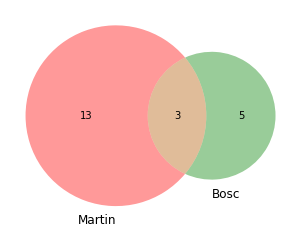

In [13]:
martin_only = set(pocket_martin_klifs_ids) - set(pocket_bosc_klifs_ids)
bosc_only = set(pocket_bosc_klifs_ids) - set(pocket_martin_klifs_ids)
both = set(pocket_bosc_klifs_ids) & set(pocket_martin_klifs_ids)
venn2(subsets=(len(martin_only), len(bosc_only), len(both)), set_labels=("Martin", "Bosc"))